# SUPPORT VECTOR MACHINES CLASIFICACIÓN

In [ ]:
# SVM hace una carretera de separación para separar categorías (también sirve para regresión)
# Solamente tiene en cuenta unos pocos puntos para construir los vectores (la carretera) que soportan el modelo
# Ventaja: que no lo afectan los outliers, no gasta tanta memoria

In [1]:
%matplotlib inline

In [2]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

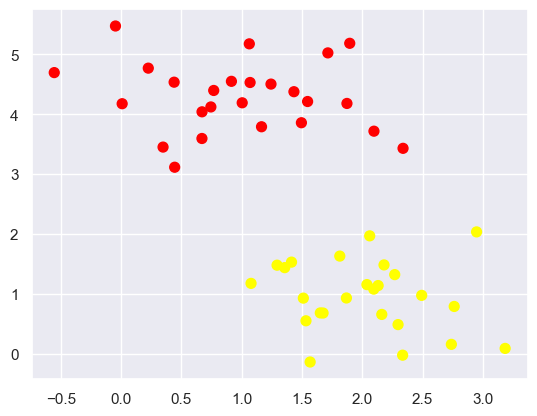

In [3]:
# Generar puntos
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [4]:
# El clasificador lineal discriminativo intenta dibujar una línea de anchura C que separe los datos
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [5]:
# Definir la función para graficar la frontera de decisión de SVM
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

# Crear cuadrícula para evaluar el modelo
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

# plot límites y márgenes de decisión
    ax.contour(X, Y, P, colors='k',
    levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])

# plot vectores de soporte
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

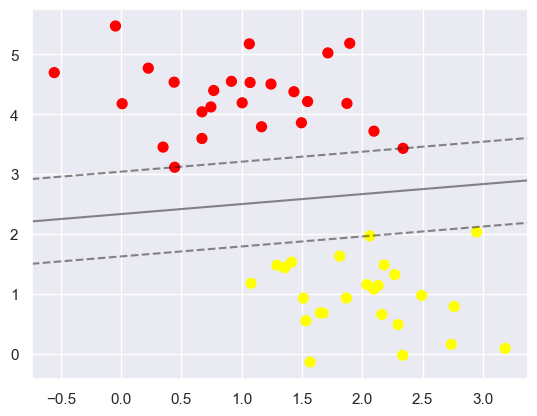

In [6]:
# Graficar datos y la frontera de decisión
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plot_svc_decision_function(model);

In [7]:
# Preguntar cuáles son los vectores que soportan el modelo (los vectores de soporte)
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

### Kernel SVM

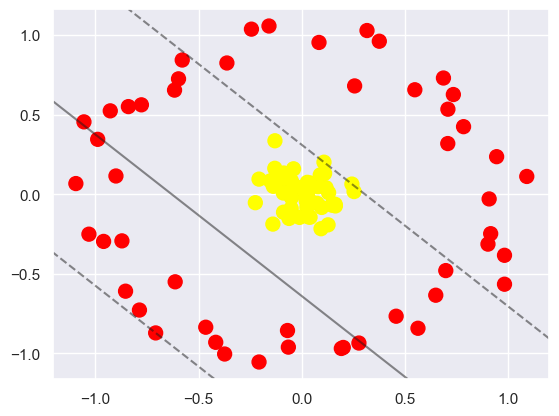

In [14]:
# Se prueba con kernel lineal
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

### Kernel basado en radianes

In [16]:
r = np.exp(-(X ** 2).sum(1))

In [17]:
# Se cambia a kernel radianes
clf =SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

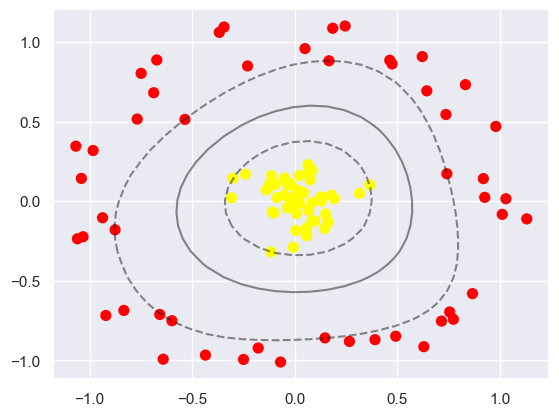

In [18]:
# Función para ver la carretera
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1,
facecolors='none');

In [19]:
# Preguntar cuáles son los vectores que soportan el modelo (los vectores de soporte)
clf.support_vectors_

array([[ 0.16668167,  0.88239008],
       [-0.5984203 , -0.75140161],
       [-0.87544689, -0.17980311],
       [-0.53493534,  0.51398162],
       [ 0.74099007,  0.17235283],
       [ 0.14736668, -0.85929689],
       [-0.30129585,  0.14525961],
       [ 0.36662501,  0.1028104 ],
       [-0.11568921, -0.31902959]])

### Solapamiento SVM –overlap-

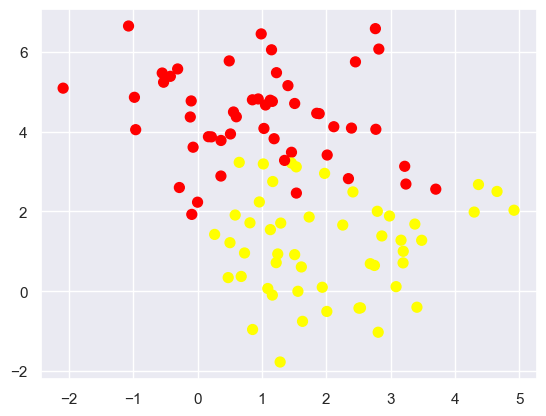

In [20]:
# Generar puntos con solapamiento
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [ ]:
# Jugar con el parámetro c

In [28]:
# Configuración de estilo
sns.set()

# Generar datos de dos clases
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

# Función para graficar la frontera de decisión
def plot_svc_decision_function(model, ax):
    """Dibuja la frontera de decisión de un SVM"""
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Crear una malla de puntos
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Dibujar las líneas de decisión y los márgenes
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
               linestyles=['--', '-', '--'])

    # Dibujar los vectores soporte
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100,linewidth=1, facecolors='none', edgecolors='none')

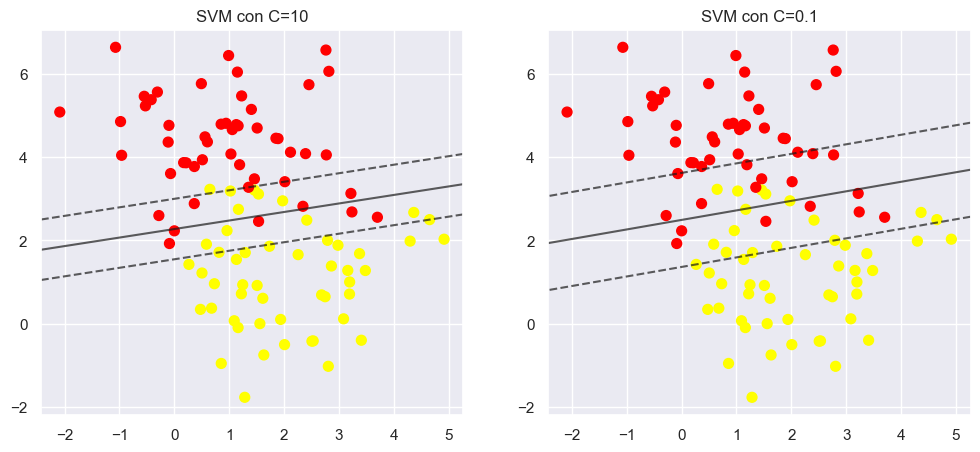

In [30]:
# Crear dos modelos con diferentes valores de C
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for C, ax in zip([10, 0.1], axes):
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

    # Graficar los datos y la frontera de decisión
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, ax)
    ax.set_title(f"SVM con C={C}")
plt.show()

Ventas de modelos SVM

- Al depender de unos pocos vectores el cálculo require poca memoria y funciona bien con datos de alta dimensión.
- Una vez entrenado el modelo, la predicción es muy rápida.
- Integración con métodos de kernel para adaptarse a los datos.
- Parametro C debe ser ajustado y validado.
- No tiene interpretación probabilística.